# Unearthing Prehistoric Marvels: Exploring Dinosaur Fossil Records and Insights

![dinosaur-image](dinosaur-image.jpg)  
Image from [Pixabay](https://pixabay.com/photos/mystery-island-dinosaur-skull-1599527/)

## Key Findings

- The dataset contains 1042 unique dinosaur names, with the top 10 most common including Richardoestesia, Saurornitholestes, and Triceratops.
- The Supersaurus, discovered in Colorado between 145 to 157 million years ago, stands as the largest dinosaur recorded in the dataset, amidst data cleanliness challenges with notable percentages of null values in key fields.
- Ornithopods, large theropods, and small theropods are the most common dinosaur types, with herbivorous dinosaurs generally being the largest.
- Dinosaur size exhibited a curvilinear relationship with time, peaking around 150 million years ago, and a slight positive correlation was observed between the age of discovery and dinosaur length.
- A significant number of dinosaur records are clustered in regions like North America, Europe, East Asia, and Southern South America, indicating paleontological hotspots.
- The analysis reveals distinct differences in average size based on dinosaur diet, with herbivorous dinosaurs being the largest, carnivorous dinosaurs intermediate, and omnivorous dinosaurs the smallest.

## Background & Objectives

You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

Help your colleagues at the museum to gain insights on the fossil record data. Include:

1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset?
4. Did dinosaurs get bigger over time?
5. Create an interactive map showing each record. 
6. Any other insights you found during your analysis?

## Introduction

In this report, I'll provide insights from our analysis of the dinosaur fossil record database. Our goal is to help the museum better understand the dataset's richness and quality. We'll explore the diversity of dinosaur species, identify the largest dinosaur, address missing data, analyze dinosaur type prevalence, investigate size evolution over time, and create an interactive map of dinosaur records. Let's dive into the fascinating world of dinosaurs and uncover valuable insights together.

## Data Description

The data was sourced from [The Paleobiology Database](https://paleobiodb.org/#/)

The following list gives the description of our key fields:

- occurence_no - The original occurrence number from the Paleobiology Database.  
- name - The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil).  
- diet - The main diet (omnivorous, carnivorous, herbivorous).  
- type - The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur).  
- length_m - The maximum length, from head to tail, in meters.  
- max_ma - The age in which the first fossil records of the dinosaur where found, in million years.  
- min_ma - The age in which the last fossil records of the dinosaur where found, in million years.  
- region - The current region where the fossil record was found.  
- lng - The longitude where the fossil record was found.  
- lat - The latitude where the fossil record was found.  
- class - The taxonomical class of the dinosaur (Saurischia or Ornithischia).  
- family - The taxonomical family of the dinosaur (if known).  

## EDA

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.style as style
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("dinosaurs.csv")
df.head()

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


In [4]:
df.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


## Main Analysis

### Dinosaur Names

There are a total of 1042 unique dinosaur names recorded. This indicates a rich diversity of dinosaur species documented within the dataset. It's interesting to note the prominence of certain species such as Richardoestesia, Saurornitholestes, and Triceratops which appear to be more frequently represented compared to others.

In [5]:
# Total count of distinct dinosaur names
dino_names_count = df["name"].value_counts()
print(len(dino_names_count))

1042


name
Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
Allosaurus           103
Camarasaurus         102
Paronychodon          99
Tenontosaurus         74
Tyrannosaurus         74
Name: count, dtype: int64


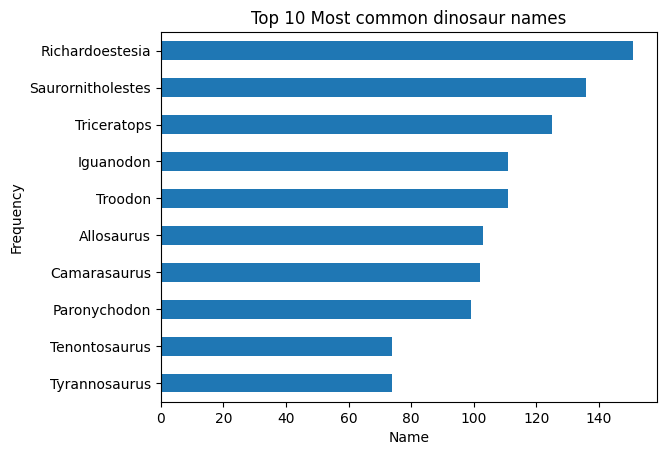

In [40]:
# Top 10 most common dinosaurs
n = 10
print(dino_names_count[:n])
dino_names_count[:n][::-1].plot(kind="barh", title=f"Top {n} Most common dinosaur names", xlabel="Name")
plt.ylabel("Frequency");

### Largest Dinosaur

The largest dinosaur recorded in terms of length is the Supersaurus which was 35 metres long from head to tail. This massive sauropod was discovered in the region of Colorado and lived between 145 to 157 million years ago. The discovery of Supersaurus underscores the immense size and diversity of prehistoric creatures that once roamed the earth.

In [7]:
# Top entry sorted by descending length
df.sort_values("length_m", ascending=False)[:1]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
1423,541209,Supersaurus,herbivorous,sauropod,35.0,157.3,145.0,Colorado,-109.036133,39.200081,Saurischia,Diplodocidae


### Missing data

There is a significant proportion of missing values across several key columns. Specifically, the percentage of null values for important fields is as follows:

Diet: 27.36%  
Type: 23.36%  
Length_m: 27.93%  
Region: 0.85%  
Family: 29.42%  

In total, only 56.41% of entries contain no null values across any field, indicating a substantial level of data incompleteness. Given the importance of fields such as type and length_m for our analysis, it is imperative to address this issue to ensure the reliability and accuracy of our findings.

To account for the high rate of missing values, a decision has been made to remove entries with null values for crucial fields such as type and length_m. This approach aims to mitigate the impact of incomplete data on our analysis and enhance the quality of insights derived from the dataset.

In [8]:
# Fraction of null values in each field
df.isna().sum()/len(df)

occurrence_no    0.000000
name             0.000000
diet             0.273682
type             0.273682
length_m         0.279338
max_ma           0.000000
min_ma           0.000000
region           0.008483
lng              0.000000
lat              0.000000
class            0.000000
family           0.294284
dtype: float64

In [9]:
# Fraction of rows with no null values
len(df.dropna())/len(df)

0.5641284588971925

In [10]:
df = df.dropna(subset=["type", "length_m"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3568 entries, 0 to 4949
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  3568 non-null   int64  
 1   name           3568 non-null   object 
 2   diet           3568 non-null   object 
 3   type           3568 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         3568 non-null   float64
 6   min_ma         3568 non-null   float64
 7   region         3551 non-null   object 
 8   lng            3568 non-null   float64
 9   lat            3568 non-null   float64
 10  class          3568 non-null   object 
 11  family         2805 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 362.4+ KB


### Type Occurence Frequency

The frequency of occurrence for different dinosaur types is as follows:

Ornithopod: 797 occurrences  
Large Theropod: 732 occurrences  
Small Theropod: 717 occurrences  
Sauropod: 664 occurrences  
Ceratopsian: 355 occurrences  
Armored Dinosaur: 303 occurrences  

It's evident that certain types of dinosaurs are more prevalent than others. These findings shed light on the relative abundance of various dinosaur types within the dataset. Ornithopods, large theropods, and small theropods emerge as the most commonly recorded types, indicating their significance and widespread presence in the fossil record. On the other hand, ceratopsians and armored dinosaurs are comparatively less represented but still constitute notable proportions of the dataset.

In [11]:
# Count of dinosaur types
dino_type_count = df["type"].value_counts()
print(dino_type_count)

type
ornithopod          797
large theropod      732
small theropod      717
sauropod            664
ceratopsian         355
armored dinosaur    303
Name: count, dtype: int64


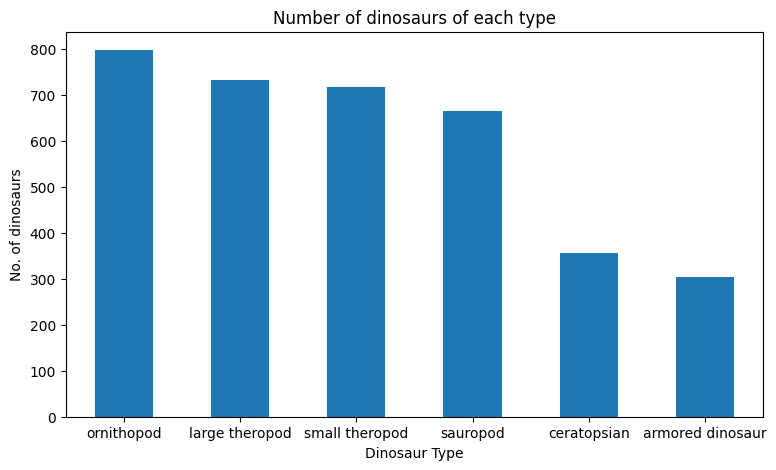

In [41]:
dino_type_count.plot(kind="bar", title="Number of dinosaurs of each type", xlabel="Dinosaur Type", rot=0, figsize=(9,5))
plt.ylabel("No. of dinosaurs");

### Dinosaur Size Trend


The analysis of the dataset suggests an intriguing trend regarding the size of dinosaurs over time. Initially, a slight positive correlation of 0.298 between the age of discovery and dinosaur length indicates that, on average, dinosaur length was decreasing as time progressed. However, a deeper examination revealed a more complex relationship.

Upon further analysis, it was observed that there exists a curvilinear relationship between the average dinosaur length and the average age of discovery. This relationship showcases a fascinating pattern: dinosaur size initially increased, peaking at approximately 16.6 meters around 150 million years ago, before gradually declining. Specifically, the average dinosaur length was estimated to be 2.5 meters 250 million years ago, surged to its peak at 16.6 meters 150 million years ago, and then declined to 6.9 meters 70 million years ago.

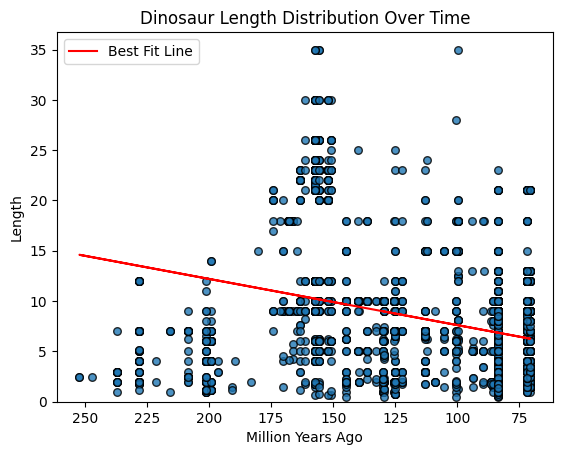

In [13]:
# Get line of best fit
slope, intercept = np.polyfit(df["max_ma"], df["length_m"], 1)

# Plot scatter matrix to observe correlation
plt.scatter(df["max_ma"], df["length_m"], s=30, alpha=0.8, edgecolors="black")
plt.plot(df["max_ma"], slope * df["max_ma"] + intercept, c="red", label="Best Fit Line")
plt.gca().invert_xaxis() # Reverses the x axis to preserve chronological order of discovery

plt.xlabel("Million Years Ago")
plt.ylabel("Length")
plt.legend()
plt.ylim(bottom=0)
plt.title("Dinosaur Length Distribution Over Time");

In [14]:
df[["max_ma", "length_m"]].corr()

,max_ma,length_m
max_ma,1.000000,0.297556
length_m,0.297556,1.000000


[2.5, 2.857142857142857, 5.116176470588235, 4.666666666666667, 4.93076923076923, 4.467200000000001, 2.2333333333333334, 8.5, 13.4, 15.631717687074831, 16.63968253968254, 7.991059602649007, 6.382992700729927, 6.385833333333333, 7.379310344827586, 10.843373493975903, 5.901754385964913, 4.990138067061144, 6.90277108433735]


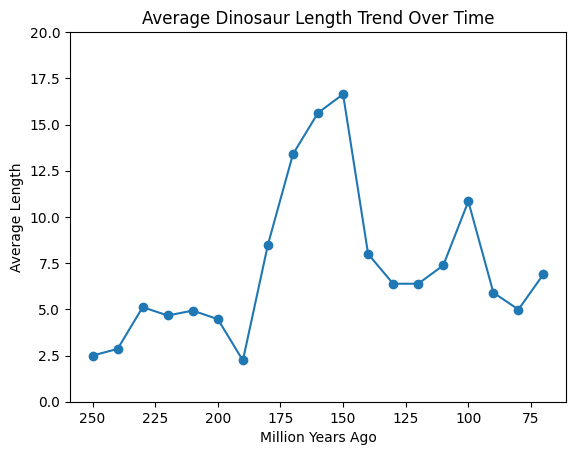

In [15]:
# Grouped age of discovery into ranges by rounding to the nearest 10 million years
df["ma_range"] = df["max_ma"].map(lambda x: round(x/10)*10)
labels = sorted(list(df["ma_range"].unique()))

# Calculated the average length of dinosaurs disovered within specified time periods
avg_length = [df["length_m"][df["ma_range"]==num].dropna().mean() for num in labels]
print(avg_length[::-1])

plt.plot(labels, avg_length, marker="o")
plt.ylim((0,20))
plt.gca().invert_xaxis()

plt.xlabel("Million Years Ago")
plt.ylabel("Average Length")
plt.title("Average Dinosaur Length Trend Over Time");

### Interactive Map

The interactive map showcasing dinosaur fossil records provides a compelling visual representation of their distribution across the globe. Each point on the map represents a unique record, with its location determined by the 'lat' (latitude) and 'lng' (longitude) columns. The points are labeled with the dinosaur names and their corresponding type. In particular, the map highlights significant clusters of dinosaur records in regions such as North America, Europe, and East Asia. These areas emerge as hotspots of paleontological activity, where a large number of dinosaur fossils have been unearthed and documented.

In [16]:
# Create an interactive map using latitude and longitude from the dataset
df['text'] = df['name'] + ' (' + df['type'] + ')'
fig = px.scatter_geo(df, lat='lat', lon='lng', hover_name='text', title='Dinosaur Locations')
fig.update_layout(showlegend=False)
fig.show()

## Other Insights

### Average size based on diet

An additional insightful observation gleaned from the analysis is the correlation between dinosaur diet and average size. The data reveals distinct differences in average size based on dietary preferences:

- Omnivorous dinosaurs exhibit an average size of approximately 4.21 meters.  
- Carnivorous dinosaurs, on the other hand, tend to be larger, with an average size of around 5.60 meters.  
- Herbivorous dinosaurs, known for their massive size, demonstrate the largest average size at approximately 10.29 meters.  

This finding sheds light on the evolutionary adaptations of dinosaurs in response to their dietary habits. It suggests a potential relationship between diet and body size, with herbivorous dinosaurs evolving larger sizes to support their specialized feeding behaviors. Conversely, carnivorous dinosaurs may have adapted to smaller sizes for agility and efficiency in hunting.

diet
herbivorous    2049
carnivorous    1307
omnivorous      212
Name: count, dtype: int64


<Axes: title={'center': 'Length Distribution of Dinosaurs'}, xlabel='Length', ylabel='Frequency'>

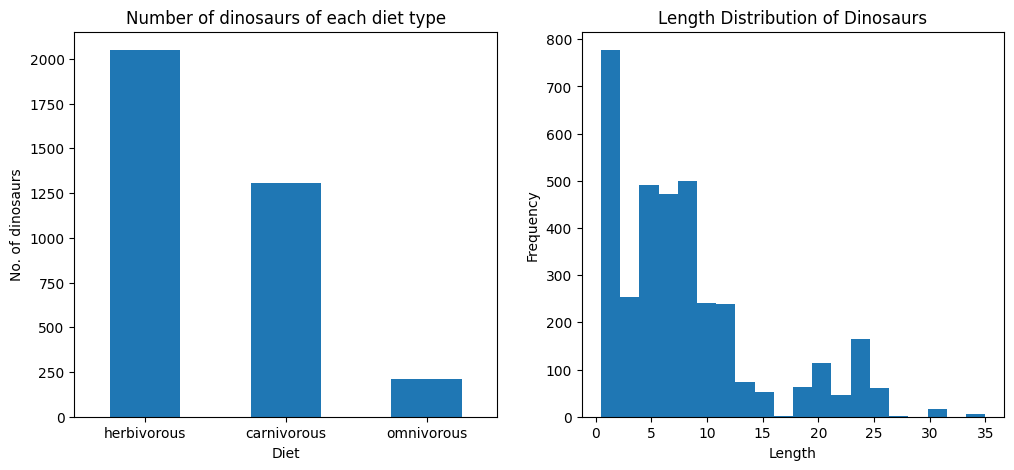

In [42]:
print(df["diet"].value_counts())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["diet"].value_counts().plot(kind="bar", ylabel="No. of dinosaurs", title="Number of dinosaurs of each diet type", xlabel="Diet", rot=0)

plt.subplot(1,2,2)
df["length_m"].plot(kind="hist", bins=20, xlabel="Length", title="Length Distribution of Dinosaurs")

{'omnivorous': 4.208962264150943, 'carnivorous': 5.598140780413161, 'herbivorous': 10.294680331869204}


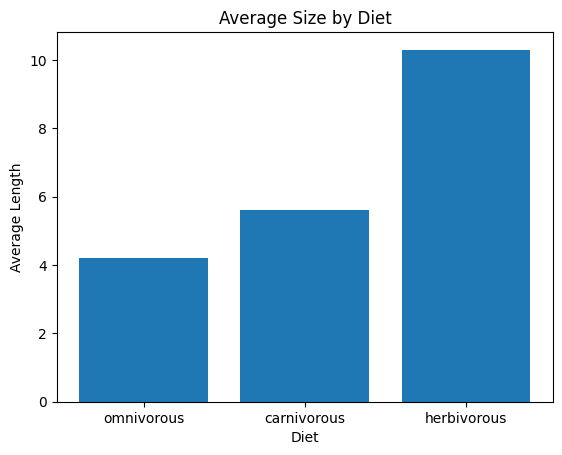

In [18]:
diets = df["diet"].unique().tolist()

size_by_diet = {diet : df["length_m"][df["diet"]==diet].mean() for diet in diets}
print(size_by_diet)
plt.bar(diets, size_by_diet.values())
plt.title("Average Size by Diet")
plt.xlabel("Diet")
plt.ylabel("Average Length");

## Conclusion and Recommendations

Based on the analyses conducted on the dinosaur fossil record dataset, several conclusions and recommendations can be drawn to enhance the museum's understanding and utilization of the data:

1. **Diversity and Distribution:** The dataset showcases a rich diversity of dinosaur species, with clusters of fossil records concentrated in regions such as North America, Europe, East Asia, and Southern South America. This indicates the importance of these regions in paleontological research and suggests potential areas for further exploration and excavation.

2. **Data Quality:** While the dataset provides valuable insights, it also exhibits a significant level of incompleteness, with a notable percentage of null values across important fields. To ensure the reliability and accuracy of analyses, it is recommended to address missing data through strategies such as imputation or removal of entries with null values in crucial fields.

3. **Evolutionary Trends:** Analyses reveal intriguing patterns in dinosaur evolution, including changes in size over time and correlations between diet and body size. These insights can contribute to our understanding of dinosaur ecology, evolution, and adaptation, enriching educational programs and exhibits at the museum.

4. **Interactive Visualization:** The creation of an interactive map offers a dynamic platform for exploring the geographical distribution of dinosaur fossils. Integrating this visualization tool into museum exhibits and educational resources can engage visitors and facilitate interactive learning experiences.

5. **Further Research Opportunities:** The analyses conducted present opportunities for further research and exploration. Future studies could delve deeper into specific evolutionary trends, regional variations in dinosaur diversity, or the impact of environmental factors on dinosaur evolution. Collaborations with researchers and institutions worldwide can broaden the scope of research initiatives and enhance the museum's contribution to paleontological knowledge.

In summary, by leveraging insights from the analyses and implementing recommendations to address data quality issues, the museum can enhance its understanding of dinosaur fossil records and enrich visitor experiences through engaging exhibits, educational programs, and ongoing research initiatives.

# Behind the Scenes of Old Hollywood: Analyzing Pre-Titanic Film Data

![movie-set](movie-set.jpg)  
Image from [Pixabay](https://pixabay.com/photos/movie-scenes-movie-backdrop-studio-3757174/)

## Key Findings

- There are 4846 unique movies in the dataset after removing duplicates.
- After cleaning the data, there are 790 null entries for gross revenue and 424 null entries for budget, suggesting the need to exclude these rows for further analysis involving these fields.
- There are 10 different certifications present in the dataset, with R being the most common followed by PG-13 and PG.
- The USA leads with 3655 movies, followed by the UK, France, Canada, and Germany, indicating Hollywood's dominance in global movie production.
- French movies have slightly shorter durations than English movies.
- There's a slight positive correlation between movie duration and gross revenue, and a moderate positive correlation between budget and gross revenue, suggesting that longer movies and those with larger budgets tend to generate higher revenues. 
- Certain certifications like PG, G, and M demonstrate higher average revenues compared to others.

## Background & Objectives

You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. How many rows have missing data?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies?
6. Any other insights you found during your analysis? 

## Introduction

In this report, I'll share insights from our analysis of the cinema.films dataset, aimed at helping the movie studio recapture the essence of old Hollywood in future productions. We'll explore the dataset's size, identify missing data, analyze certifications, uncover top movie-producing countries, compare English and French film durations, and reveal any other notable findings. Let's dive into the data and inspire the next generation of cinematic masterpieces.

## Data Description

The data was sourced from [IMDb](https://www.imdb.com/)

The following list gives the description of our key fields:

- id - Unique movie identifier. 
- title - The title of the movie.  
- release_year - The year the movie was released to the public.  
- country - The country in which the movie was released.  
- duration - The runtime of the movie, in minutes.  
- language - The original language the movie was produced in.  
- certification - The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences.  
- gross - The revenue the movie generated at the box office, in USD.  
- budget - The available budget the production had for producing the movie, in USD.  

## EDA

In [19]:
# SELECT * 
# FROM cinema.films

In [20]:
films = pd.read_csv("films.csv")

In [21]:
films.describe()

,id,release_year,duration,gross,budget
count,4968.000000,4926.000000,4955.000000,4.158000e+03,4.538000e+03
mean,2484.500000,2002.466098,107.947931,4.870511e+07,3.990283e+07
std,1434.282399,12.470683,23.490189,6.982501e+07,2.064232e+08
min,1.000000,1916.000000,7.000000,1.620000e+02,2.180000e+02
25%,1242.750000,1999.000000,94.000000,5.354373e+06,6.000000e+06
50%,2484.500000,2005.000000,104.000000,2.552969e+07,2.000000e+07
75%,3726.250000,2011.000000,118.000000,6.232050e+07,4.500000e+07
max,4968.000000,2016.000000,334.000000,9.366274e+08,1.221550e+10


In [22]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4968 non-null   int64  
 1   title          4968 non-null   object 
 2   release_year   4926 non-null   float64
 3   country        4966 non-null   object 
 4   duration       4955 non-null   float64
 5   language       4955 non-null   object 
 6   certification  4666 non-null   object 
 7   gross          4158 non-null   float64
 8   budget         4538 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 349.4+ KB


In [23]:
# Removing duplicate rows
columns = films.columns.to_list()
columns.remove("id")

films = films.drop_duplicates(subset=columns)
films.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4847 entries, 0 to 4967
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4847 non-null   int64  
 1   title          4847 non-null   object 
 2   release_year   4805 non-null   float64
 3   country        4845 non-null   object 
 4   duration       4834 non-null   float64
 5   language       4834 non-null   object 
 6   certification  4547 non-null   object 
 7   gross          4056 non-null   float64
 8   budget         4422 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 378.7+ KB


## Main Analysis

### Movies Present

There are 4844 unique movie titles. However, upon further examination, it was found that three of these titles have two entries each. Upon closer inspection, it was discovered that only one title, "Ben-Hur," had its two entries as duplicates, and the other titles are different mocies with the same name. After removing these duplicates, we can confirm that there are a total of 4846 unique movies present in the dataset.

In [24]:
films["title"].value_counts()

title
The Host                                            2
Ben-Hur                                             2
Out of the Blue                                     2
Intolerance: Love's Struggle Throughout the Ages    1
Madea Goes to Jail                                  1
                                                   ..
Super Troopers                                      1
Summer Catch                                        1
Spy Kids                                            1
Spy Game                                            1
Yu-Gi-Oh! Duel Monsters                             1
Name: count, Length: 4844, dtype: int64

In [25]:
films[films["title"]=="The Host"]

,id,title,release_year,country,duration,language,certification,gross,budget
2703,2704,The Host,2006.0,South Korea,110.0,Korean,R,2201412.0,1.221550e+10
4294,4295,The Host,2013.0,USA,125.0,English,PG-13,26616999.0,4.000000e+07


In [26]:
films[films["title"]=="Out of the Blue"]

,id,title,release_year,country,duration,language,certification,gross,budget
270,271,Out of the Blue,1980.0,Canada,94.0,English,R,NaN,2200000.0
2643,2644,Out of the Blue,2006.0,New Zealand,100.0,English,NaN,728.0,NaN


In [27]:
films[films["title"]=="Ben-Hur"]

,id,title,release_year,country,duration,language,certification,gross,budget
4831,4832,Ben-Hur,2016.0,USA,141.0,English,PG-13,NaN,NaN
4832,4833,Ben-Hur,2016.0,USA,141.0,English,PG-13,NaN,100000000.0


In [28]:
films = films.drop(4831)

In [29]:
len(films)

4846

### Missing Data


After removing duplicate entries from the dataset, we observed that there are 790 null entries for the 'gross' field and 424 null entries for the 'budget' field. It is advisable to exclude these rows with missing data for the 'gross' and 'budget' fields from further analysis involving these variables to ensure the integrity and accuracy of the analysis.

Additionally, other columns also have missing data, with 42 null entries for 'release_year', 2 null entries for 'country', 13 null entries for both 'duration' and 'language', and 300 null entries for 'certification'. While these missing values may impact certain analyses, they are relatively fewer in comparison to the missing data in the 'gross' and 'budget' fields. Hence, for a more robust analysis, it's recommended to handle missing values appropriately, such as through imputation or exclusion based on the specific analysis being conducted.

id                 0
title              0
release_year      42
country            2
duration          13
language          13
certification    300
gross            790
budget           424
dtype: int64


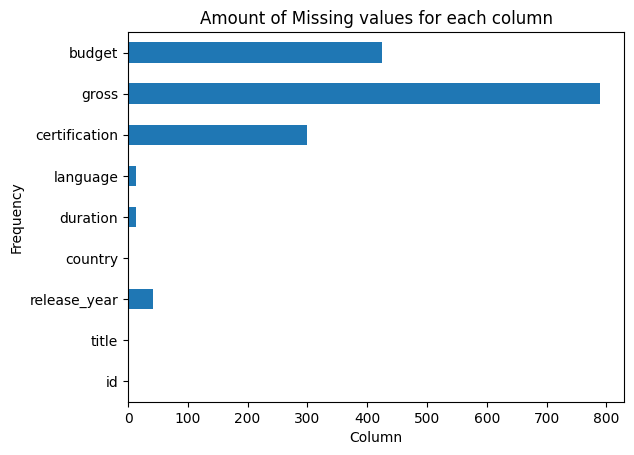

In [30]:
print(films.isna().sum())
films.isna().sum().plot(kind="barh", title="Amount of Missing values for each column", xlabel="Column", ylabel="Frequency");

### Variety of Certifications

Certifications or ratings assigned to movies serve as indicators of their suitability for different audiences based on content, language, violence, and other factors. These ratings are often assigned by regulatory bodies or film boards to guide viewers in making informed choices about the movies they watch.
Excluding movies without ratings, 10 different certifications were identified to be present in the dataset. The count of movies with specified certifications is as follows:

R: 2069  
PG-13: 1412  
PG: 686  
G: 112  
Approved: 54  
X: 12  
Passed: 9  
NC-17: 7  
GP: 6  
M: 5  

These certifications provide valuable insights into the content rating distribution of the movies in the dataset. It's evident that the majority of the films are rated R or PG-13, which suggests a predominant focus on mature or adolescent audiences.

In [31]:
films["certification"].unique().tolist()

['Not Rated',
 nan,
 'Passed',
 'Unrated',
 'Approved',
 'G',
 'PG',
 'R',
 'PG-13',
 'M',
 'GP',
 'X',
 'NC-17']

certification
R           2069
PG-13       1412
PG           686
G            112
Approved      54
X             12
Passed         9
NC-17          7
GP             6
M              5
Name: count, dtype: int64


C:\Users\DELLL\AppData\Local\Temp\ipykernel_583876\3819215404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



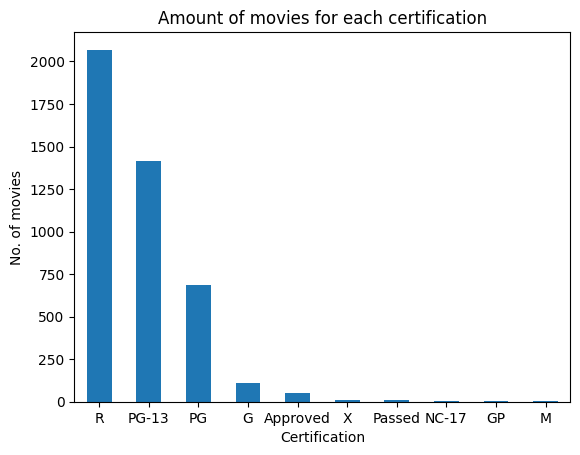

In [32]:
films["certification"][(films["certification"]=="Not Rated") | (films["certification"]=="Unrated")] = pd.NA

print(films["certification"].dropna().value_counts())
films["certification"].dropna().value_counts().plot(kind="bar", title="Amount of movies for each certification", ylabel="No. of movies", xlabel="Certification", rot=0);

### Top movie producing countries

The country of production often influences a movie's style, language, cultural context, and target audience. Understanding which countries produce the most movies provides insights into global filmmaking trends and industry dynamics. Analysis of the dataset, we've identified the top five countries with the most significant number of movies produced:

USA: 3655  
UK: 429  
France: 153  
Canada: 121  
Germany: 94  

The United States led the pack by a significant margin, followed by the UK, France, Canada, and Germany. This distribution reflects the dominance of Hollywood in the global film industry, as well as the contributions of other major filmmaking hubs.

country
USA        3655
UK          429
France      153
Canada      121
Germany      94
Name: count, dtype: int64


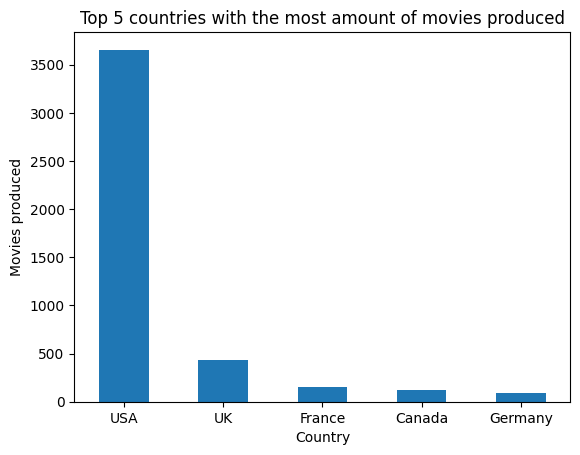

In [33]:
print(films["country"].value_counts()[:5])
films["country"].value_counts()[:5].plot(kind="bar", title="Top 5 countries with the most amount of movies produced", ylabel="Movies produced", xlabel="Country", rot=0);

### Average duration of movies (English vs French)

French movies have an average duration of 1 hour 44 minutes and 40 seconds, which is slightly shorter than that of English movies, averaging at 1 hour 47 minutes and 30 seconds. Furthermore, the standard deviation of the duration for French movies is smaller compared to that of English movies, indicating less variability in the length of French films. Additionally, French movies have fewer outliers in terms of duration compared to English movies. This suggests that French movies tend to adhere more closely to a consistent duration, potentially reflecting stylistic or cultural preferences within the French film industry.

Average duration of English movies: 107.4982245894363
Average duration of French movies: 104.66666666666667


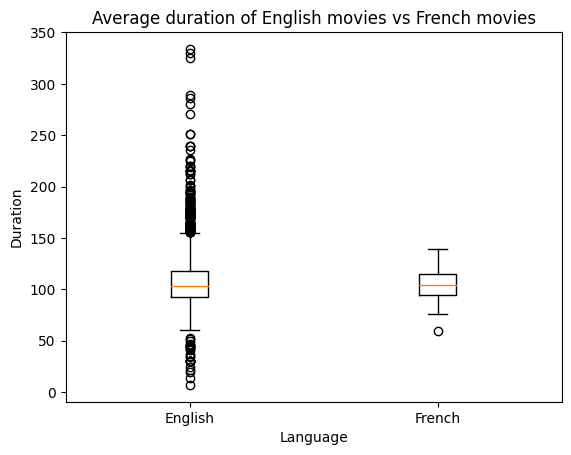

In [34]:
films_dur = films.dropna(subset=["duration"])
eng_dur = films_dur["duration"][films_dur["language"]=="English"]
fre_dur = films_dur["duration"][films_dur["language"]=="French"]

print(f"Average duration of English movies: {sum(eng_dur)/len(eng_dur)}")
print(f"Average duration of French movies: {sum(fre_dur)/len(fre_dur)}")
plt.boxplot([eng_dur, fre_dur], labels=["English", "French"])
plt.xlabel("Language")
plt.ylabel("Duration")
plt.title("Average duration of English movies vs French movies");

In [35]:
print(eng_dur.std(), fre_dur.std())

22.982203633717244 16.174227456135792


## Other Insights

### Correlation between movie duration, budget, and revenue


Further exploration was conducted into the correlation between movie duration, gross revenue, and budget. To ensure data integrity, the dataset was cleaned by removing missing values and filtering out outliers beyond the 99th percentile in the columns under consideration

In [36]:
numerical_cols = ["duration", "gross", "budget"]

# Removing all entries with null values
films_clean = films.dropna()

# Removing outliers by filtering entries that are within 99th percentile
for col in numerical_cols:
    films_clean = films_clean[films_clean[col] < np.percentile(films_clean[col], 99)]
films_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3552 entries, 5 to 4925
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3552 non-null   int64  
 1   title          3552 non-null   object 
 2   release_year   3552 non-null   float64
 3   country        3552 non-null   object 
 4   duration       3552 non-null   float64
 5   language       3552 non-null   object 
 6   certification  3552 non-null   object 
 7   gross          3552 non-null   float64
 8   budget         3552 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 277.5+ KB


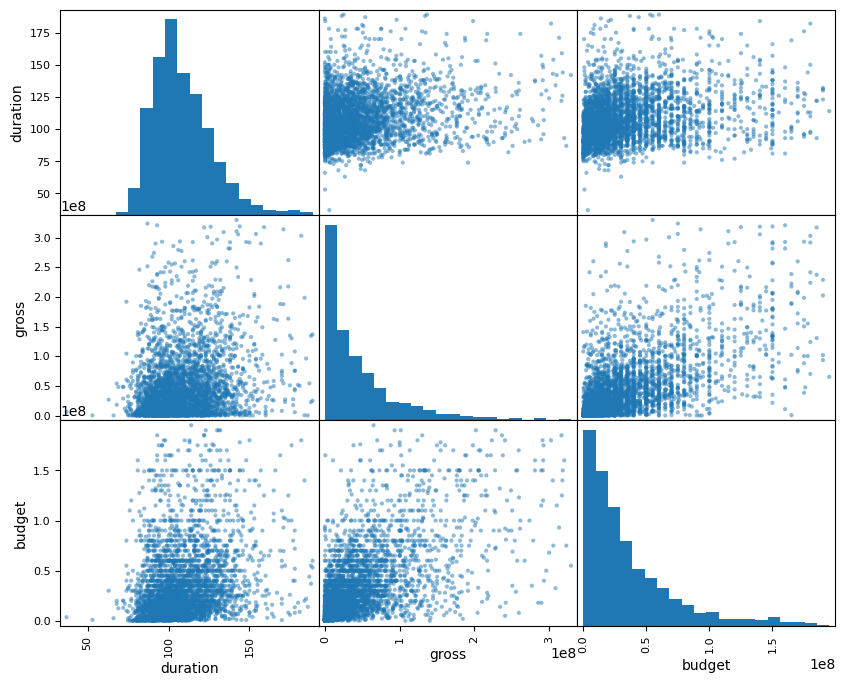

In [37]:
scatter_matrix(films_clean[numerical_cols], hist_kwds={"bins": 20}, figsize=(10,8));

In [38]:
films_clean[numerical_cols].corr()

,duration,gross,budget
duration,1.000000,0.236204,0.260871
gross,0.236204,1.000000,0.599321
budget,0.260871,0.599321,1.000000


The analysis revealed some noteworthy insights:

1. Correlation between Duration and Gross/Budget (0.236/0.261):
We found a slight positive correlation between movie duration and both gross revenue and budget. This suggests a weak relationship between movie duration and the financial aspects of the film industry. While longer movies may potentially attract more revenue and investment, the correlation is not particularly strong, indicating that other factors also play significant roles in determining a movie's success.

2. Correlation between Budget and Gross (0.599):
There is a moderate positive correlation between movie budget and gross revenue. This finding implies that movies with larger budgets tend to generate more revenue compared to movies with smaller budgets. This aligns with the common understanding that higher investment often correlates with increased production value and marketing efforts, potentially leading to higher box office returns.

### Average revenue by certification

Let's examine the average revenue generated by different film certifications. Here are the key insights:

1. Variation in Average Revenue Across Certifications:
We can observe significant variations in average revenue across different film certifications. While NC-17 and Passed certifications have relatively lower average revenues, ranging from 4 to 11 million dollars, other certifications such as R, GP, Approved, PG-13, M, PG, and G exhibit substantially higher average revenues, ranging from 30 to 68 million dollars.

2. Highest Average Revenue Certifications:
The certifications with the highest average revenues are PG, G, and M, each generating average revenues exceeding 60 million dollars. These certifications typically indicate films suitable for broader audiences, including children and families, and their higher average revenues suggest their popularity and commercial success.

3. Impact of Certification on Revenue Potential:
The analysis underscores the influence of certification on a movie's revenue potential. Films with certifications indicating broader audience appeal, such as PG and G, tend to achieve higher average revenues compared to those with more restrictive certifications like NC-17 and X.

Average revenue by rating
NC-17       4.476870e+06
Passed      1.100354e+07
X           1.778701e+07
R           3.101301e+07
GP          4.380000e+07
Approved    4.398523e+07
PG-13       5.688132e+07
M           6.255445e+07
PG          6.791748e+07
G           6.850167e+07
dtype: float64


<Axes: title={'center': 'Average Revenue by certification'}, xlabel='Certification', ylabel='Average Revenue'>

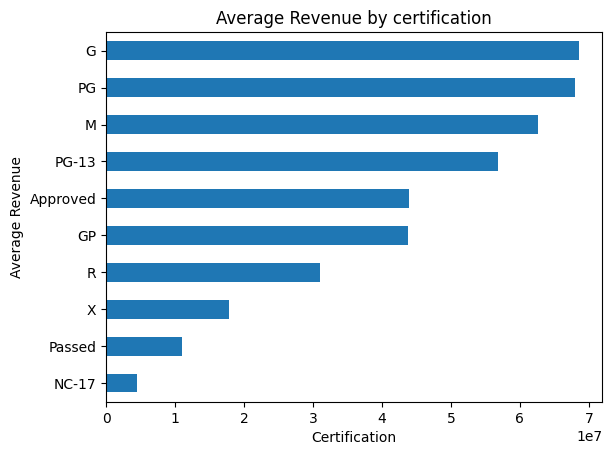

In [39]:
certifications = films_clean["certification"].unique().tolist()
gross_by_cert = pd.Series({val : films_clean["gross"][films_clean["certification"]==val].mean() for val in certifications}).sort_values()

print("Average revenue by rating")
print(gross_by_cert)
gross_by_cert.plot(kind="barh", xlabel="Certification", ylabel="Average Revenue", title="Average Revenue by certification")

## Conclusion and Recommendations

Based on the analyses conducted on the _cinema.films_ dataset, several conclusions can be drawn, along with recommendations for the movie studio:

1. **Certification Diversity:**
   The dataset exhibits a diverse range of certifications, indicating the varied content and target audiences of the movies. To maximize audience reach and appeal, the studio should consider producing a mix of movies catering to different certification categories. This approach would allow them to target specific demographics while ensuring a broad audience appeal across various genres and themes.

2. **Country of Production:**
   The majority of movies in the dataset originate from the United States, followed by the UK, France, Canada, and Germany. While Hollywood remains a dominant force in the industry, there are significant contributions from other countries as well. The studio could explore collaborations with international filmmakers and production companies to leverage diverse storytelling perspectives and tap into global audiences.

3. **Duration and Revenue Correlation:**
   The analysis suggests a slight positive correlation between movie duration and gross revenue, indicating that longer movies may attract more revenue, albeit weakly. Additionally, a moderate positive correlation exists between budget and gross revenue, implying that higher budget investments often translate to higher revenue returns. To optimize revenue potential, the studio should consider strategic budget allocation and duration planning based on genre, target audience, and market trends.

4. **Certification and Revenue Potential:**
   Certain certifications, such as PG, G, and M, demonstrate higher average revenues compared to others. This suggests that movies catering to broader audience demographics tend to generate more revenue. Therefore, the studio should carefully consider certification choices to align with audience preferences and maximize revenue potential for each film project.

Based on these conclusions, I would recommend the movie studio to:

- Diversify their movie portfolio by producing films across various certification categories to appeal to a wide range of audience demographics.
- Explore international collaborations to tap into diverse storytelling perspectives and expand market reach beyond traditional territories.
- Conduct thorough market research to determine optimal budget allocation and duration planning strategies for each film project, considering genre, audience preferences, and revenue expectations.
- Strategically select certifications for each film to maximize revenue potential and ensure alignment with target audience preferences and content suitability.

By implementing these recommendations, the movie studio can enhance its competitiveness, maximize revenue potential, and deliver captivating content that resonates with global audiences.